# MNIST Digit Classification 🧠✍️

This notebook demonstrates a simple but powerful machine learning task: **classifying handwritten digits** using the MNIST dataset.

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a classic benchmark in the field of machine learning and computer vision. It contains **70,000 grayscale images** of handwritten digits from 0 to 9—60,000 for training and 10,000 for testing. Each image is **28x28 pixels**.

In this notebook, we will:
- Load and explore the MNIST dataset
- Preprocess the data for model input
- Train a classifier 
- Evaluate its performance
- Visualize predictions and misclassifications

This project is a great starting point for anyone learning about image classification, deep learning, or neural networks. Let's get started! 🚀


## Load Data

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
minst = fetch_openml('mnist_784', version=1)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = minst['data'], minst['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
numerical_data = pd.concat([X, y], axis=1)
numerical_data_5 = numerical_data[numerical_data['class'] == '5']
numerical_data_5.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
digit = X[:1].to_numpy()
digit_image = digit.reshape(28, 28)

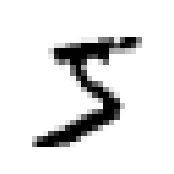

In [8]:
plt.figure(figsize=(2, 2))
plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

## Data Split

- The MNIST dataset already split into a training and a test set the last 10,000 images.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [11]:
y_train_5 = (y_train == '5')
y_test5 = (y_test == '5')

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [14]:
some_digit = X[1:2].to_numpy()
some_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
        159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
        252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [15]:
some_digit_image = some_digit.reshape(28, 28)

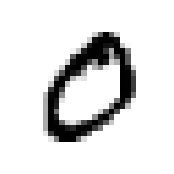

In [16]:
plt.figure(figsize=(2, 2))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [17]:
digit_five = numerical_data.drop(columns=['class']).iloc[[65]].to_numpy()
digit_five

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [18]:
digit_five_image = digit_five.reshape(28, 28)

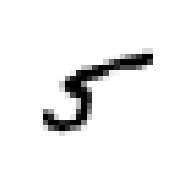

In [19]:
plt.figure(figsize=(2, 2))
plt.imshow(digit_five_image, cmap="binary")
plt.axis("off")
plt.show()

In [20]:
sgd_clf.predict(digit_five)

c:\Users\REDTECH\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Implementing Cross-Validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn import clone

In [ ]:
# It splits the data into 3 parts (folds).
#  Stratified means each fold will have the same proportion of classes
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for train_inddex, test_index in skfold.split(X_train, y_train_5):

    # This makes a fresh copy of classifier so it doesn't "remember" training from earlier folds.
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_inddex]
    y_train_folds = y_train_5.iloc[train_inddex]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9598333333333333
0.962
0.9421666666666667
0.9673333333333334
0.9541666666666667


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy" )

array([0.95035, 0.96035, 0.9604 ])